ASSIGNMENT 2
Aneesh Chattaraj
Student ID: 826860

Data Sources:
What Yelp fake review filter might be doing? A. Mukherjee, V. Venkataraman, B. Liu, and N. S.
Glance, ICWSM, 2013.
Collective Opinion Spam Detection: Bridging Review Networks and Metadata. Shebuti Rayana,
Leman Akoglu, ACM SIGKDD, Sydney, Australia, August 10-13, 2015


In [1]:
from sklearn.svm import LinearSVC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report

from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.linear_model import SGDClassifier



stop_words = ['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 'not',
 'only',
 'own',
 'same',
 'so',
 'than',
 'too',
 'very',
 's',
 't',
 'can',
 'will',
 'just',
 'don',
 'should',
 "should've",
 'now',
 'd',
 'll',
 'm',
 'o',
 're',
 've',
 'y',
 'ain',
 'won']

In [2]:
#Change the path of the review_text_train.csv, review_meta_train.csv and review_text_test.csv files here
yelp_reviews=pd.read_csv(r'review_text_train.csv')
yelp_meta=pd.read_csv(r'review_meta_train.csv')
dev=pd.read_csv(r"review_text_test.csv")
dev=dev.review
yelp_meta.head()


,date,review_id,reviewer_id,business_id,vote_funny,vote_cool,vote_useful,rating
0,3/15/2012,-s77HISu8DVQ8F0HxmWW6A,mthr7h15a_z9m9jRI6mG6Q,m5_GCJP2W4zEJnyVgxa3eA,0,1,3,1
1,6/21/2010,A2aCzGCgg6gAbatHiCrPfA,rhM01fl3iU0xHr3TIpCMhQ,m5_GCJP2W4zEJnyVgxa3eA,0,0,0,5
2,7/29/2011,DK2pd,SNHKDgmGiLn5chUlhdLCkg,CwPi6NVuJIZZx4IBcTekFQ,1,0,1,5
3,3/10/2006,b3BkUiWJEKNQko,HXjk1RVfLMPeZxitnk1Auw,43rd1LKcZRIunySzbMsyLQ,17,3,3,3
4,8/28/2012,RabHhte,W0ny0BqO0OJ4K4aVnSIlBw,CwPi6NVuJIZZx4IBcTekFQ,0,0,0,3


In [3]:
yelp_reviews=pd.DataFrame(yelp_reviews)
rating_train_meta=yelp_meta.rating
yelp_reviews['rating']=rating_train_meta

,vote_funny,vote_cool,vote_useful
rating,,,
1,0.888699,0.382277,1.366438
3,0.420236,0.402545,0.787399
5,0.449191,0.621112,0.811178


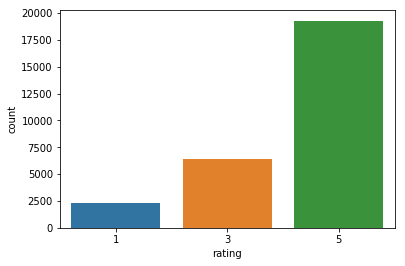

In [4]:
ratingmean = yelp_meta.groupby('rating').mean()
sns.countplot(x='rating',data=yelp_reviews)
ratingmean

In [5]:
# add number of characters column
yelp_reviews["char_count"] = yelp_reviews["review"].apply(lambda x: len(x))

# add number of words column
yelp_reviews["words_count"] = yelp_reviews["review"].apply(lambda x: len(x.split(" ")))
yelp_reviews["count_stopwords"]=yelp_reviews["review"].apply(lambda x: len([x for x in x.split() if x in stop_words]))

yelp_reviews.groupby('rating').mean()

,char_count,words_count,count_stopwords
rating,,,
1,922.241866,172.767551,71.874572
3,825.649286,153.361732,61.831006
5,686.606439,125.914766,49.412018


In [6]:
labels = ["1","3","5"]

In [5]:
#using doc2vec    Change the path to doc2vec files here appropriately
x_train50=pd.read_csv(r'./review_text_features_doc2vec50/review_text_train_doc2vec50.csv',dtype=str, header=None)
dev50=pd.read_csv(r'./review_text_features_doc2vec50/review_text_test_doc2vec50.csv',dtype=str, header=None)

x_train100=pd.read_csv(r'./review_text_features_doc2vec100/review_text_train_doc2vec100.csv',dtype=str, header=None)
dev100=pd.read_csv(r'./review_text_features_doc2vec100/review_text_test_doc2vec100.csv',dtype=str, header=None)

x_train200=pd.read_csv(r'./review_text_features_doc2vec200/review_text_train_doc2vec200.csv',dtype=str, header=None)
dev200=pd.read_csv(r'./review_text_features_doc2vec200/review_text_test_doc2vec200.csv',dtype=str, header=None)

y_train=yelp_reviews['rating']
model = SGDClassifier()
NV_model=model.fit(x_train50,y_train)
pred50 = NV_model.predict(x_train50)
report=(classification_report(y_train, pred50, target_names=labels,output_dict=True))
df = pd.DataFrame(report).transpose()

accuracy50 = accuracy_score(y_train, pred50)
print('Accuracy',100*accuracy50,'%')
df

C:\Users\ANEESH CHATTARAJ\Anaconda31\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


NameError: name 'labels' is not defined

In [8]:

model = SGDClassifier()
NV_model=model.fit(x_train100,y_train)
pred100= NV_model.predict(x_train100)
report=(classification_report(y_train, pred100, target_names=labels,output_dict=True))
df = pd.DataFrame(report).transpose()


accuracy100 = accuracy_score(y_train, pred100)
print('Accuracy',100*accuracy100,'%')
df

C:\Users\ANEESH CHATTARAJ\Anaconda31\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Accuracy 78.54852501068834 %


,f1-score,precision,recall,support
1,0.473784,0.648327,0.373288,2336.0
3,0.593800,0.588684,0.599007,6444.0
5,0.877731,0.858623,0.897708,19288.0
micro avg,0.785485,0.785485,0.785485,28068.0
macro avg,0.648439,0.698545,0.623334,28068.0
weighted avg,0.778926,0.779147,0.785485,28068.0


In [9]:
model = SGDClassifier()
NV_model=model.fit(x_train200,y_train)
pred200= NV_model.predict(x_train200)
report=(classification_report(y_train, pred200, target_names=labels,output_dict=True))
df = pd.DataFrame(report).transpose()

accuracy200 = accuracy_score(y_train, pred200)
print('Accuracy',100*accuracy200,'%')
df

C:\Users\ANEESH CHATTARAJ\Anaconda31\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Accuracy 80.11614650135385 %


,f1-score,precision,recall,support
1,0.454671,0.645161,0.351027,2336.0
3,0.631284,0.617198,0.646027,6444.0
5,0.889883,0.872930,0.907507,19288.0
micro avg,0.801161,0.801161,0.801161,28068.0
macro avg,0.658613,0.711763,0.634854,28068.0
weighted avg,0.794291,0.795262,0.801161,28068.0


In [10]:
x_reviews= yelp_reviews['review']
y_reviews = yelp_reviews['rating']

In [11]:
x_reviews = x_reviews.apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

In [12]:

k=pd.DataFrame()
k['rating']=yelp_reviews['rating']
k["char_count"]=x_reviews.apply(lambda x: len(x))
k["word_count"]=x_reviews.apply(lambda x: len(x.split(" ")))
k.groupby('rating').mean()

,char_count,word_count
rating,,
1,641.053938,100.562072
3,584.351800,91.170236
5,494.309985,76.216611


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer  

In [14]:
vec=CountVectorizer()

In [15]:
reviewfit = vec.fit_transform(x_reviews)
devfit=vec.transform(dev)

Holdout method

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(reviewfit, y_reviews, test_size=0.2, random_state=101)

0.8444959030993944


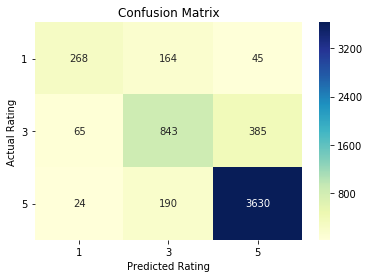

In [18]:

model=MultinomialNB()
model.fit(X_train,Y_train)
predictionsmulti = model.predict(X_test)
predictionsdev=model.predict(devfit)

print(accuracy_score(Y_test,predictionsmulti))

accuracymultinomialbest=accuracy_score(Y_test,predictionsmulti)

#result1=pd.DataFrame(predictionsdev)
#result1.columns=['rating']
#result1.index.names = ['Instance_id']
#result1.index += 1 

#result1.to_csv(r'resultmultinomial.csv')


labels = [1,3,5]

cm=confusion_matrix(Y_test,predictionsmulti,labels)
cm = pd.DataFrame(cm, index=labels, columns=labels)
sns.heatmap(cm, annot=True, fmt='d',cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Rating")
plt.ylabel("Actual Rating")
plt.yticks(rotation=0)
plt.show()


C:\Users\ANEESH CHATTARAJ\Anaconda31\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.8648022800142501


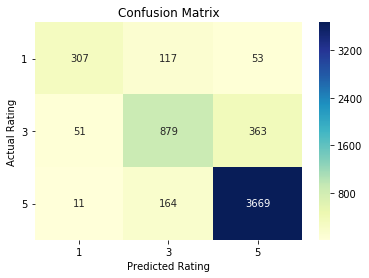

In [19]:

model=MLPClassifier(max_iter=2,activation='relu',solver='adam')

model.fit(X_train,Y_train)
predictionsmlp = model.predict(X_test)
predictionsdev=model.predict(devfit)

print(accuracy_score(Y_test,predictionsmlp))

labels = [1,3,5]

cm=confusion_matrix(Y_test,predictionsmlp,labels)
cm = pd.DataFrame(cm, index=labels, columns=labels)
sns.heatmap(cm, annot=True, fmt='d',cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Rating")
plt.ylabel("Actual Rating")
plt.yticks(rotation=0)
plt.show()



In [19]:
accuracymlpbest=(accuracy_score(Y_test,predictionsmlp))

In [20]:
#accuracymlpbest=(accuracy_score(Y_test,predictionsmlp))
#result=pd.DataFrame(predictionsdev)
#result.columns=['rating']
#result.index.names = ['Instance_id']
#result.index += 1 

#result.to_csv(r'resultmlp.csv')


0.8498396864980406


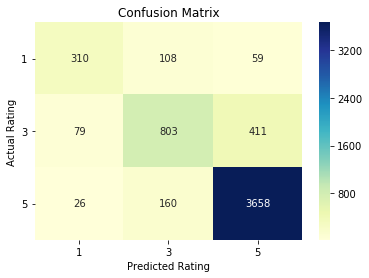

In [26]:

model=SGDClassifier(max_iter=5)
model.fit(X_train,Y_train)
predictionssgd = model.predict(X_test)
predictionsdev=model.predict(devfit)

print(accuracy_score(Y_test,predictionssgd))

accuracysgd=accuracy_score(Y_test,predictionssgd)

#result2=pd.DataFrame(predictionsdev)
#result2.columns=['rating']
#result2.index.names = ['Instance_id']
#result2.index += 1 

#result2.to_csv(r'resultsgd.csv')


labels = [1,3,5]

cm=confusion_matrix(Y_test,predictionssgd,labels)
cm = pd.DataFrame(cm, index=labels, columns=labels)
sns.heatmap(cm, annot=True, fmt='d',cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Rating")
plt.ylabel("Actual Rating")
plt.yticks(rotation=0)
plt.show()


After analysing various classifiers MLP turns out to produce higher accuracy everytime even though it produces a different accuracy each time.

Cross Validation to see which classifier works best

Would not recommend this section since it takes a while

In [27]:
from sklearn.model_selection import cross_val_score
model=MLPClassifier(max_iter=2)
cv_scores = cross_val_score(model, reviewfit, y_reviews, cv=5)

print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))

C:\Users\ANEESH CHATTARAJ\Anaconda31\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\ANEESH CHATTARAJ\Anaconda31\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\ANEESH CHATTARAJ\Anaconda31\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\ANEESH CHATTARAJ\Anaconda31\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't co

[0.85752449 0.86551478 0.86711792 0.85551399 0.86368496]
cv_scores mean:0.8618712276244749


C:\Users\ANEESH CHATTARAJ\Anaconda31\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [39]:

model=MultinomialNB()
cv_scores = cross_val_score(model, reviewfit, y_reviews, cv=5)

print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))

[0.84487979 0.85055219 0.85215533 0.84963478 0.84461867]
cv_scores mean:0.8483681507780073


In [40]:
model=SGDClassifier(max_iter=5)
cv_scores = cross_val_score(model, reviewfit, y_reviews, cv=5)

print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))

C:\Users\ANEESH CHATTARAJ\Anaconda31\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


[0.83241318 0.84413965 0.84645529 0.84339925 0.84622238]
cv_scores mean:0.8425259505106512


Again MLP has the average high score!

In [25]:
#To find best parameters with random state 8 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

model=MLPClassifier(max_iter=2)
parameter_grid = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],}



grid_search = GridSearchCV(model, parameter_grid, n_jobs=-1, cv=20)
model.fit(X_train, Y_train)



C:\Users\ANEESH CHATTARAJ\Anaconda31\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [26]:
grid_search

GridSearchCV(cv=20, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50), (100,)], 'activation': ['relu'], 'solver': ['sgd', 'adam'], 'alpha': [0.0001, 0.05], 'learning_rate': ['constant', 'adaptive']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [27]:
predictionsmlpgrid = model.predict(X_test)
predictionsdevgrid=model.predict(devfit)

print(accuracy_score(Y_test,predictionsmlpgrid))

0.8615960099750624


In [28]:
#result=pd.DataFrame(predictionsdevgrid)
#result.columns=['rating']
#result.index.names = ['Instance_id']
#result.index += 1 

#result.to_csv(r'resultmlpvfrid.csv')

Best Parameters for MLP is ------> activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False

In [34]:
a_dict = dict()

In [35]:
a_dict['sgd_doc2vec50']=accuracy50
a_dict['sgd_doc2vec100']=accuracy100
a_dict['sgd_doc2vec200']=accuracy200
a_dict['MLP_text']=accuracymlpbest
a_dict['MultinomialNB']=accuracymultinomialbest

a_dict['SGD']=accuracysgd


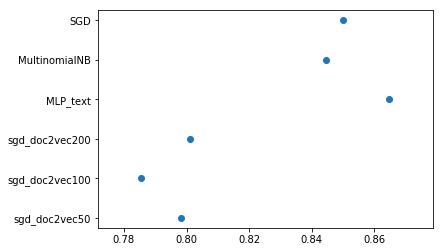

In [36]:
plt.scatter( list(a_dict.values()),list(a_dict.keys()))

# # for python 2.x:
# plt.bar(range(len(D)), D.values(), align='center')  # python 2.x
# plt.xticks(range(len(D)), D.keys())  # in python 2.x

plt.show()